Binary classification of problem of students graduating or dropping out
Algorithm: Random Forest
Author: Demetreous Stillman

In [47]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [48]:
# Shows the cross validation scores for a range of k values so the best one can be selected.

# Load the CSV file into a dataFrame
df_with_enrolled = pd.read_csv("/Users/demetreousstillman/Desktop/CSE_5160_Project/dropout_data.csv", sep=";")

# Filter rows where the 'Target' column is not equal to 'Enrolled'
df = df_with_enrolled[df_with_enrolled['Target'] != 'Enrolled']

# Define a mapping dictionary to convert categories to numerical values
target_mapping = {'Graduate': 0, 'Dropout': 1}
# Use the mapping dictionary to replace values in the "Target" column
df['Target'] = df['Target'].replace(target_mapping)

# X contains all columns except the "Target" column
X = df.drop("Target", axis=1) 
# y contains only the "Target" column
y = df["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/9g/2y_gmxqn22l8hl960qphhhmw0000gn/T/ipykernel_36793/2402685619.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].replace(target_mapping)


In [ ]:
# Perform cross-validation for different max leaf nodes
max_leaf_nodes_list = []
mean_cv_scores = []

for max_depth in range(2, 50):
    class_weights = {0: 1.0, 1: 1.55453905700211}
    rf_cv = BalancedRandomForestClassifier(n_estimators=100, max_depth = max_depth, class_weight = class_weights, criterion = "gini")
    rf_cv.fit(X_train, y_train)
    cv_scores = cross_val_score(rf_cv, X, y, cv = 10)
    max_leaf_nodes_list.append(max_depth)
    mean_cv_scores.append(cv_scores.mean())

#Plot the line graph 
plt.figure (figsize=(10, 6))
plt.plot(max_leaf_nodes_list, mean_cv_scores, marker= 'o')
plt.title('Mean Cross-Validation Score vs. Max Leaf Nodes')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Mean CV Score')
plt.grid(True)
plt.xticks(range (2, 50))
plt.tight_layout()
plt.show()

In [59]:
# Create a Balanced Random Forest classifier
#rf = BalancedRandomForestClassifier(n_estimators=90, random_state=42, max_depth =25) # Accuracy 0.8857

class_weights = {0: 1.0, 1: 1.55453905700211} # Class weights added becauses od the class imbalance
#class_weights = {0: 1.0, 1: 3.0} # recall is a little better
#rf = BalancedRandomForestClassifier(n_estimators=90, random_state=42, max_depth =25, class_weight=class_weights) #Acc: 0.8953

rf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, max_depth =30, class_weight=class_weights) #30


# Fit the classifier to your training data
rf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

BalancedRandomForestClassifier(class_weight={0: 1.0, 1: 1.55453905700211},
                               max_depth=30, random_state=42)

In [62]:
scores = cross_val_score(rf, X_train, y_train, cv=10)
print("Cross Validation Scores Array:")
print(scores)
print("\nMean Cross Validation Score:", np.mean(scores))
print("Standard Deviation of Cross Validation Scores:", np.std(scores))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in th

Cross Validation Scores Array:
[0.91752577 0.90721649 0.89690722 0.89690722 0.9137931  0.9137931
 0.92413793 0.89310345 0.87241379 0.92068966]

Mean Cross Validation Score: 0.9056487735513686
Standard Deviation of Cross Validation Scores: 0.015030092831087534


In [63]:
# Evaluate training accuracy
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate test accuracy
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9972
Test Accuracy: 0.8939


In [66]:
# Evaluate training error
train_error = mean_squared_error(y_train, y_train_pred)
print(f"Training Error: {train_error:.4f}")

# Evaluate test accuracy
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Test Error: {test_error:.4f}")

Training Error: 0.0028
Test Error: 0.1061


In [64]:
target_names = ['Graduate', 'Dropout']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

    Graduate       0.91      0.92      0.92       449
     Dropout       0.87      0.84      0.86       277

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.89       726
weighted avg       0.89      0.89      0.89       726



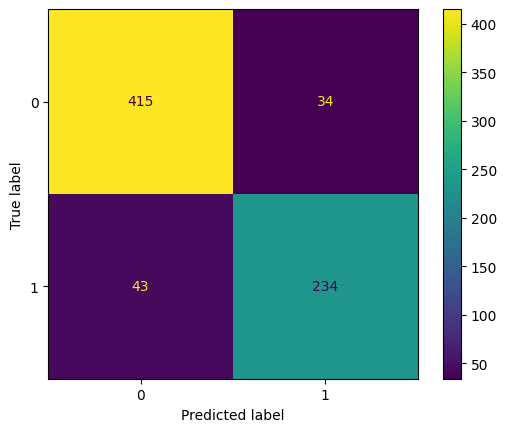

In [65]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()